<a href="https://colab.research.google.com/github/rajutjr/Netflix-data/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science project on Netflix Data



Data analysis and Data visualization on Netflix data 


Import Basic Libraries 

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from termcolor import colored 
import warnings 
warnings.filterwarnings("ignore")

Loading and Reading the dataset

In [ ]:
df= pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 8807 rows and 12 columns in the dataset.


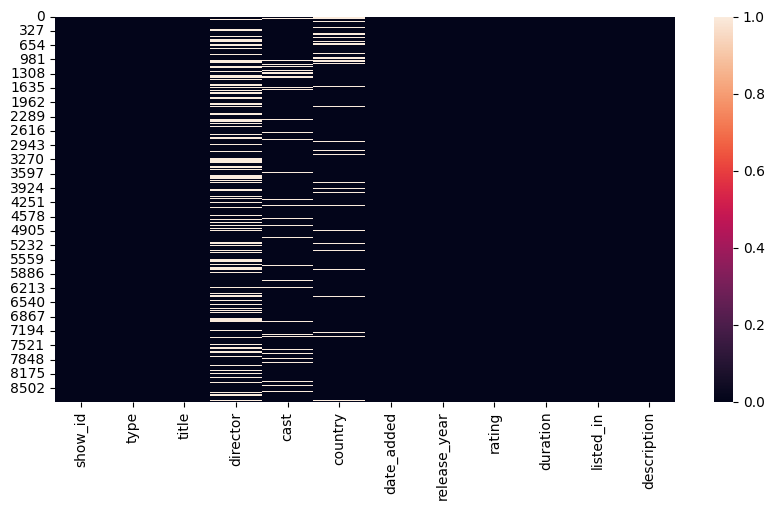

director's null rate :29.91%
cast's null rate :9.37%
country's null rate :9.44%
date_added's null rate :0.11%
rating's null rate :0.05%
duration's null rate :0.03%


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()
for i in df.columns: 
  null_rate = df[i].isna().sum()/len(df)*100
  if null_rate >0:
    print("{}'s null rate :{}%".format(i,round(null_rate,2)))
  

In [ ]:
df.drop(['director'],axis=1,inplace=True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df['country'].replace(np.NaN,'United States',inplace=True)
df['cast'].replace(np.NaN,'No Data',inplace=True)
print(colored(
    "I will drop the missing rows from the columns 'date_added' and 'rating' since these have only {} missing rows in total.".format(df.isnull().sum().sum()),attrs=['bold']))


I will drop the missing rows from the columns 'date_added' and 'rating' since these have only 17 missing rows in total.


In [ ]:
df.dropna(inplace=True)
print(colored("There are {} rows and {} columns after handling the missing records in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 8790 rows and 11 columns after handling the missing records in the dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   cast          8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
 10  description   8790 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.1+ KB


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month 
df['month_name_added']=df['date_added'].dt.month_name() 
df['year_added']=df['date_added'].dt.year 
df.drop('date_added',axis=1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,cast,country,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,No Data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


Content type on Netflix




.Lets findout the what type of contents are present in the dataset

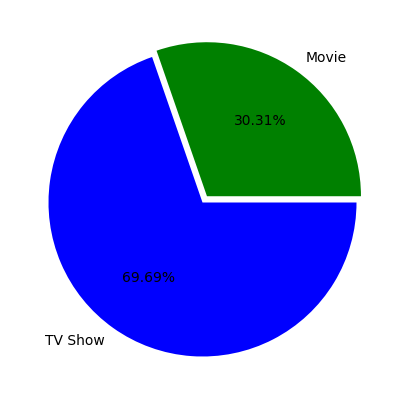

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(),labels=df['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','Blue'])
plt.show()

In [ ]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(',',',').replace(',',',').split(',')))).sort_values(ascending=False)

In [ ]:
top20country = country_count.head(20)

In [ ]:
from matplotlib import gridspec 
fig = plt.figure(figsize=(20,7))
gs = gridspec.GridSpec(nrows=1,ncols=2, height_ratios=[6],width_ratios=[10,5])

<Figure size 2000x700 with 0 Axes>

Text(0.5, 1.0, 'top 20')

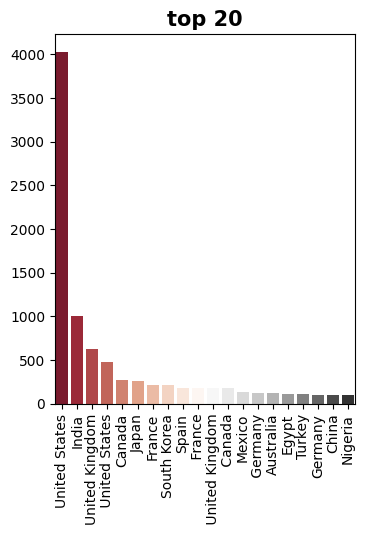

In [ ]:
ax = plt.subplot(gs[0])
sns.barplot( x=top20country.index ,y= top20country ,ax=ax,palette="RdGy")
ax.set_xticklabels(top20country.index , rotation=90)
ax.set_title('top 20',fontsize=15,fontweight='bold')

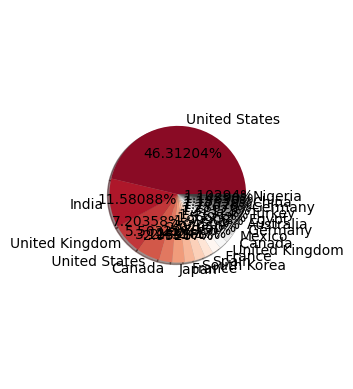

In [ ]:
ax2=plt.subplot(gs[1])
ax2.pie(top20country,labels=top20country.index,shadow=True,startangle=0,colors=sns.color_palette("RdGy",n_colors=20),
        autopct='%1.5f%%')
ax2.axis('equal')
plt.show()

content added over the year

In [ ]:
df_tv = df[df["type"]=="Tv show"]
df_movies = df[df["type"]=="Movie"]

In [ ]:
df_content = df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))


df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

contents over the months

In [ ]:
df_content = df[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))


df_tv2 = df_tv[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_tv2['percent'] = df_tv2['count'].apply(lambda x : 100*x/sum(df_tv2['count']))


df_movies2 = df_movies[['month_added','month_name_added']].value_counts().reset_index().rename(columns = {
    0 : 'count'}).sort_values('month_added').drop('month_added',axis=1)
df_movies2['percent'] = df_movies2['count'].apply(lambda x : 100*x/sum(df_movies2['count']))

t1 = go.Scatter(x=df_movies2['month_name_added'], y=df_movies2["count"], name="Movies", marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_tv2['month_name_added'], y=df_tv2["count"], name="TV Shows", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_content['month_name_added'], y=df_content["count"], name="Total Contents", marker=dict(color="Brown"))


data = [t1, t2, t3]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Pie-chart for Rating

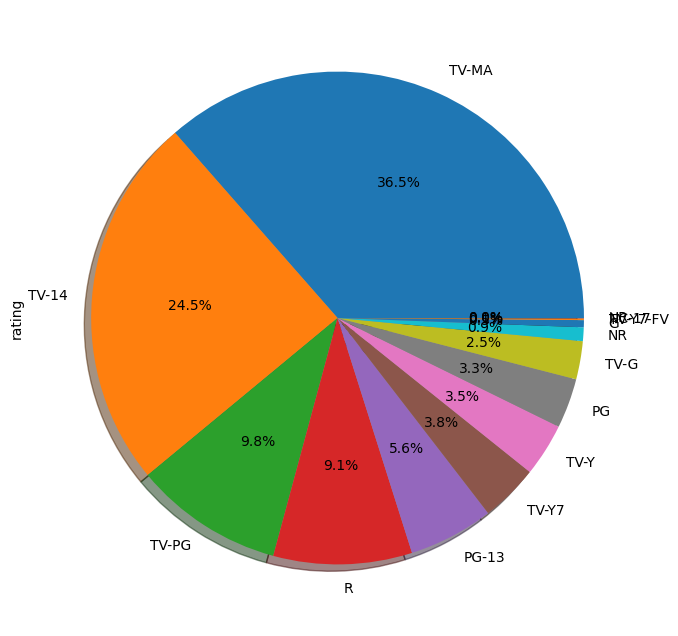

In [ ]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()